In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
#sets the backend of matplotlib to the 'inline' backend

Data is downloaded from https://archive.ics.uci.edu/ml/datasets/Car+Evaluation and converted to car_data.xlsx

In [2]:
data = pd.read_excel("data/processed/car_data.xlsx")

## Exploratory Data Analysis(EDA)

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.info() # Check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
class_names = set(data['class'])

In [6]:
# check for unique values of each column
for i in data.columns:
    print(f'{data[i].nunique()}\t{data[i].unique()}')

4	['vhigh' 'high' 'med' 'low']
4	['vhigh' 'high' 'med' 'low']
4	['2' '3' '4' '5more']
3	['2' '4' 'more']
3	['small' 'med' 'big']
3	['low' 'med' 'high']
4	['unacc' 'acc' 'vgood' 'good']


Converted string values to integers to make them compatible with scikit learn

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


### Splitting data into training and testing set

In [8]:
Y = data['class']  # actual output
X = data[data.columns[:-1]]  # input data features
data, target = X, Y
from sklearn.model_selection import train_test_split as SPLIT
X_train, X_test, Y_train, Y_test = SPLIT(X, Y, test_size=0.3, random_state=4)
# 70% Data for Training, 30% Data for Testing

### Scale the Data

In [9]:
from sklearn.preprocessing import StandardScaler as SS

X = SS().fit_transform(X)

## Train the Support Vector Classifier

In [10]:
from sklearn.svm import SVC

# Hyperparameters
kernel = 'rbf'
C = 13
gamma = 0.325

from time import time as T
start = T()
model = SVC(kernel=kernel, C=C, gamma=gamma)
clf = model.fit(X_train, Y_train)
end = T()

pred = clf.predict(X_test)
mScore = clf.score(X_test, Y_test)
print(f'Score against Testing Data: {mScore * 100:.3f}%')
print(f'Model took {(end-start)*1000:.3f}ms to train')

Score against Testing Data: 99.422%
Model took 146.998ms to train


### Generate Classification Report

In [11]:
from sklearn.metrics import classification_report as CR

print("Classification Report:\n",CR(Y_test, pred, zero_division=0))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       117
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00       368
           3       1.00      0.82      0.90        17

    accuracy                           0.99       519
   macro avg       0.99      0.96      0.97       519
weighted avg       0.99      0.99      0.99       519



### Cross Validation

In [12]:
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.model_selection import cross_val_score as CVS

model = SVC(kernel='rbf', C=13, gamma=0.325)
folds = 5

start = T()
cross_val = SKF(n_splits=folds, shuffle=True, random_state=4)
scores = CVS(model, X, Y, scoring='accuracy', cv=cross_val)
end = T()

accuracy = scores.mean() * 100
print(f"SVC has mean accuracy of {accuracy:.3f}%\n"
    + f"Cross Validation took {(end-start)*1000:.3f}ms")

SVC has mean accuracy of 99.942%
Cross Validation took 1037.988ms


### Calculate F1-Score of the model

In [13]:
from sklearn.metrics import f1_score as F1

f1score = F1(Y_test, pred, average = 'weighted')
print(f"SVC has F1-Score = {f1score * 100:.3f}%")

SVC has F1-Score = 99.398%


### Plot Confusion Matrix

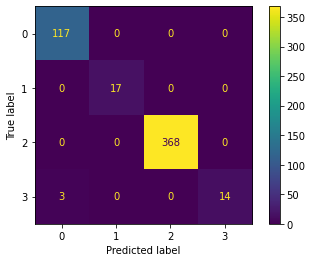

In [14]:
from sklearn.metrics import plot_confusion_matrix as PCM
PCM(clf, X_test, Y_test);